In [1]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Operator
from qiskit.circuit.library import CCZGate
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
backend = Aer.get_backend('qasm_simulator')
backend_options = {'method': 'statevector'}

In [3]:
def run_simulation(quantum_circuit, backend_options=backend_options, noise_model=None, name='psi_1'):
    job = backend.run(quantum_circuit, run_options=backend_options, noise_model=noise_model)
    result    = job.result()
    psi_out = result.data(0)[name]
    return psi_out.probabilities_dict()["000"]

In [4]:
def grover_with_cycles(cycles):
    
    ccz = CCZGate()
    qc = QuantumCircuit(3)

    qc.h(0)
    qc.h(1)
    qc.h(2)

    for _ in range(cycles):
        # Oracle
        qc.x(0)
        qc.x(1)
        qc.x(2)
        qc.append(ccz, [0, 1, 2])

        qc.x(0)
        qc.x(1)
        qc.x(2)

        # Diffusion
        qc.h(0)
        qc.h(1)
        qc.h(2)
        qc.x(0)
        qc.x(1)
        qc.x(2)

        qc.append(ccz, [0, 1, 2])

        qc.x(0)
        qc.x(1)
        qc.x(2)

        qc.h(0)
        qc.h(1)
        qc.h(2)

    qc.save_statevector(label='psi_out')
    return run_simulation(qc, name='psi_out')


In [13]:
grover_with_cycles(2)

np.float64(0.9453124999999998)

In [6]:
values = []
for i in range(100):
    values += [grover_with_cycles(i)]

In [7]:
values

[np.float64(0.12500000000000006),
 np.float64(0.7812500000000001),
 np.float64(0.9453124999999998),
 np.float64(0.33007812499999933),
 np.float64(0.012207031250000186),
 np.float64(0.5479736328125007),
 np.float64(0.9997863769531242),
 np.float64(0.5769729614257795),
 np.float64(0.019456863403319882),
 np.float64(0.30289125442505016),
 np.float64(0.9312659502029422),
 np.float64(0.8049252331256845),
 np.float64(0.14496535807847807),
 np.float64(0.10631610639393477),
 np.float64(0.7566136685200053),
 np.float64(0.957837310736066),
 np.float64(0.35784565916401023),
 np.float64(0.006624104054936238),
 np.float64(0.5188103668497234),
 np.float64(0.9980784876574935),
 np.float64(0.6057092550646486),
 np.float64(0.02834882610866753),
 np.float64(0.27637795146251737),
 np.float64(0.9157456617569603),
 np.float64(0.8275584639767208),
 np.float64(0.16614395423721795),
 np.float64(0.08897752458258218),
 np.float64(0.7311004269084261),
 np.float64(0.9687975821445225),
 np.float64(0.38609896862770

/tmp/ipykernel_50106/2592873853.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


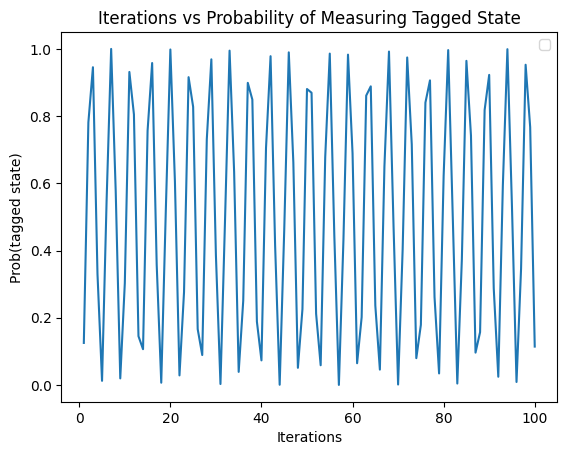

In [8]:
x = [i for i in range(1,101)]

plt.plot(x, values)
# Add labels and title
plt.xlabel('Iterations')
plt.ylabel('Prob(tagged state)')
plt.title('Iterations vs Probability of Measuring Tagged State')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [9]:
1/(np.pi*2*np.sqrt(2)/4)

np.float64(0.45015815807855303)

In [10]:
 * np.pi*np.sqrt(2)/2 - 0.5

SyntaxError: can't use starred expression here (1652542440.py, line 1)

In [138]:
6401/ (np.pi*np.sqrt(2)/4)

np.float64(5762.924739721636)

In [140]:
grover_with_cycles(6)

np.float64(0.9997863769531242)